In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
# import arabic_reshaper
# from bidi.algorithm import get_display
from matplotlib.patches import Rectangle
import operator as op
from functools import reduce

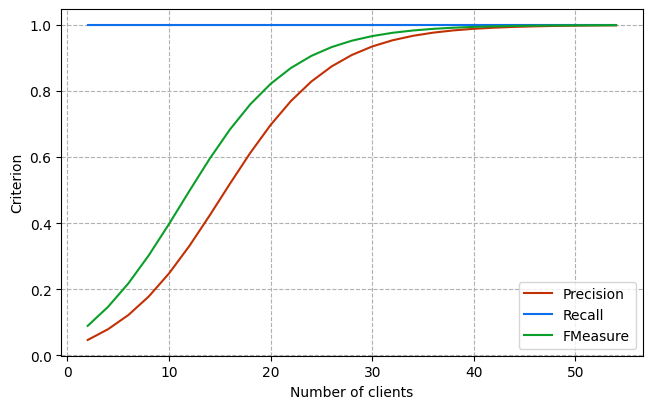

In [33]:
# consensus - criterion-N
# accuracy
# generating data
p = 500
th = 0.002
n = 40
sigma = 0.001
beta = 0.05
s_0 = 10


def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

xx = []
R_max = sigma * math.sqrt(s_0) * math.log(p) / n
sig_max = math.sqrt(math.pow(sigma, 2) * (1 + math.sqrt(math.log(p / n))))
# fp
if th <= R_max:
    temp1 = 1
else:
    temp1 = 0
temp2 = 1 - 0.5 * (math.erf((th + R_max)/(math.sqrt(2) * sig_max)) + math.erf((th - R_max)/(math.sqrt(2) * sig_max)))
if temp1 >= temp2:
    P_fp = temp1
else:
    P_fp = temp2
# tp
if th <= (R_max + beta):
    temp1 = 1
else:
    temp1 = 0
temp2 = 1 - 0.5 * (math.erf((th + R_max + beta)/(math.sqrt(2) * sig_max)) + math.erf((th - R_max - beta)/(math.sqrt(2) * sig_max)))
if temp1 <= temp2:
    P_tp = temp1
else:
    P_tp = temp2

N = 2
Precision = []
Recall = []
FM = []
while N <= 55:
  fp = 0
  for i in range(int(N/2), N + 1):
    fp += ncr(N,i) * math.pow(P_fp, i) * math.pow(1 - P_fp, N - i)
  tn = (p - s_0) * (1 - fp)
  fp = (p - s_0) * fp
  tp = 0
  for i in range(int(N/2), N + 1):
    tp += ncr(N,i) * math.pow(P_tp, i) * math.pow(1 - P_tp, N - i)
  tp = s_0 * tp
  Recall.append(tp/s_0)
  Precision.append(tp/(tp+fp+0.00000000000001))
  FM.append((2*tp)/(tp+fp+s_0))
  xx.append(N)
  N += 2
# ---------------------------------------------------------------------------------------------------------------------------------------  
def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(7.5, 4.5))    
    
    currentAxis = plt.gca()
    ax.plot(xx, Precision, '-', label = 'Precision', color = '#C23005')
    ax.plot(xx, Recall, '-', label = 'Recall', color = '#0E6FEC')
    ax.plot(xx, FM, '-', label = 'FMeasure', color = '#0B9F2A')
    ax.grid(linestyle = '--')
    
    plt.ylabel('Criterion')
    plt.xlabel('Number of clients')
    ax.legend()

demo('default')

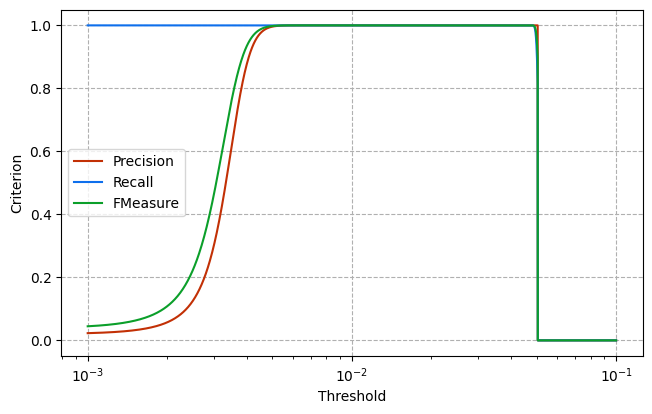

In [35]:
# consensus - threshold
# accuracy
# generating data
p = 500
n = 40
N = 5
sigma = 0.001
beta = 0.05
s_0 = 10


def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

xx = []
R_max = sigma * math.sqrt(s_0) * math.log(p) / n
sig_max = math.sqrt(math.pow(sigma, 2) * (1 + math.sqrt(math.log(p / n))))

th = 0.001
acc = []
FM = []
precision = []
recall = []
while th <= 0.1:
  # fp
  if th <= R_max:
      temp1 = 1
  else:
      temp1 = 0
  temp2 = 1 - 0.5 * (math.erf((th + R_max)/(math.sqrt(2) * sig_max)) + math.erf((th - R_max)/(math.sqrt(2) * sig_max)))
  if temp1 >= temp2:
      P_fp = temp1
  else:
      P_fp = temp2
  # tp
  if th <= (R_max + beta):
      temp1 = 1
  else:
      temp1 = 0
  temp2 = 1 - 0.5 * (math.erf((th + R_max + beta)/(math.sqrt(2) * sig_max)) + math.erf((th - R_max - beta)/(math.sqrt(2) * sig_max)))
  if temp1 <= temp2:
      P_tp = temp1
  else:
      P_tp = temp2
  fp = 0
  for i in range(int(N/2), N + 1):
    fp += ncr(N,i) * math.pow(P_fp, i) * math.pow(1 - P_fp, N - i)
  tn = (p - s_0) * (1 - fp)
  fp = (p - s_0) * fp
  tp = 0
  for i in range(int(N/2), N + 1):
    tp += ncr(N,i) * math.pow(P_tp, i) * math.pow(1 - P_tp, N - i)
  tp = s_0 * tp
  acc.append((tp+tn)/p)
  FM.append((2*tp)/(tp+fp+s_0))
  precision.append(tp/(tp + fp + 0.00000000001))
  recall.append(tp/s_0)
  xx.append(th)
  th += 0.00001
# ---------------------------------------------------------------------------------------------------------------------------------------  
def demo(sty):
    mpl.style.use(sty)
    fig, ax = plt.subplots(figsize=(7.5, 4.5))    
    
    currentAxis = plt.gca()
    ax.plot(xx, precision, '-', label = 'Precision', color = '#C23005')
    ax.plot(xx, recall, '-', label = 'Recall', color = '#0E6FEC')
    ax.plot(xx, FM, '-', label = 'FMeasure', color = '#0B9F2A')
    ax.grid(linestyle = '--')
    
    plt.ylabel('Criterion')
    plt.xlabel('Threshold')
    plt.xscale('log')
    ax.legend()

demo('default')

In [ ]:
print(tp)
print(fp)

0.0
0.0


In [ ]:
# package installation
!pip install python-bidi
!pip install arabic_reshaper

  Created wheel for arabic-reshaper: filename=arabic_reshaper-2.1.1-cp36-none-any.whl size=16504 sha256=64d5fa2514fc5e93e2514b72e2a79569ad0f1c3b5ac259f9da369aeafbd29746
  Stored in directory: /root/.cache/pip/wheels/62/52/d8/bd0dcbf00f9e77e3bd0184285ed77dfa9c475dac494a5353d1
Successfully built arabic-reshaper
